The dataset was taken from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

In [30]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Machine Learning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning


In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('./StudentsPerformance.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [33]:
import matplotlib.pyplot as plt
import numpy as np

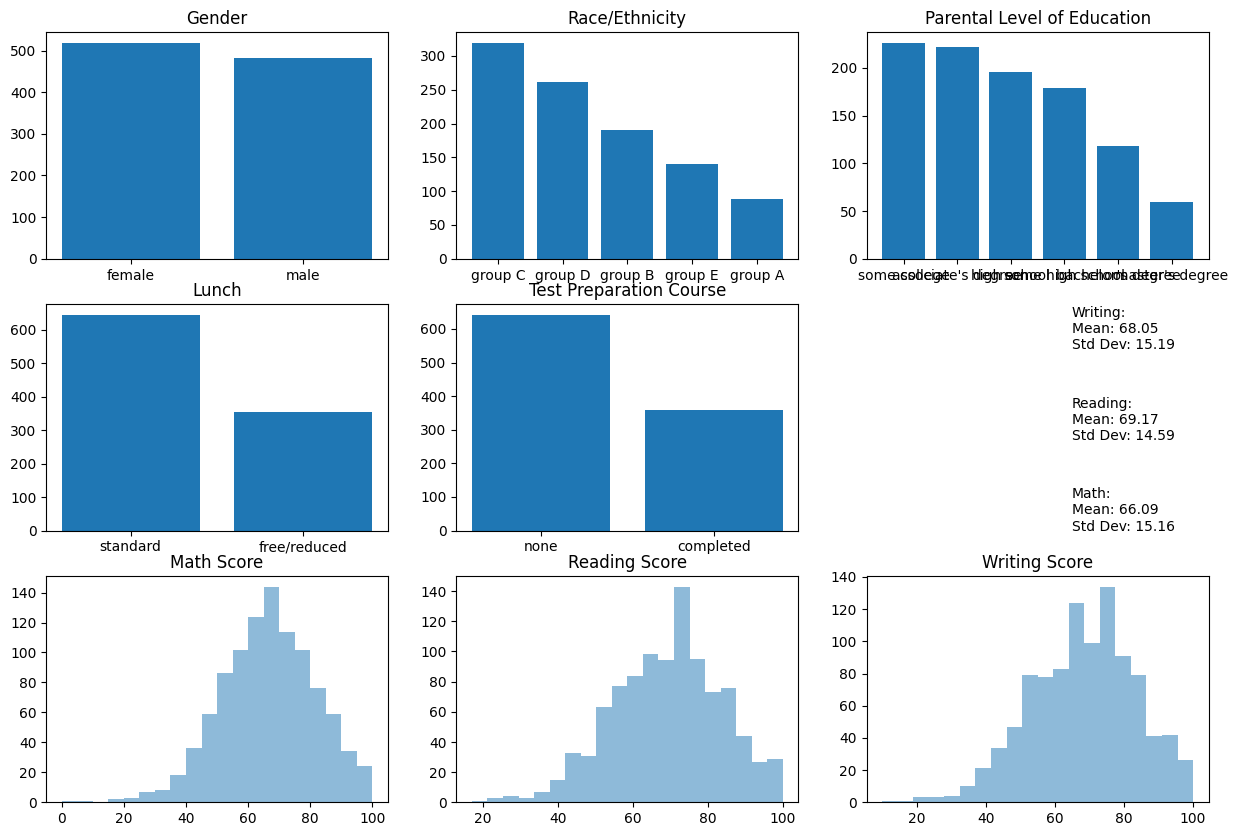

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

gender_counts = df['gender'].value_counts()
axs[0, 0].bar(gender_counts.index, gender_counts.values)
axs[0, 0].set_title('Gender')

ethnicity_counts = df['race/ethnicity'].value_counts()
axs[0, 1].bar(ethnicity_counts.index, ethnicity_counts.values)
axs[0, 1].set_title('Race/Ethnicity')

parental_counts = df['parental level of education'].value_counts()
axs[0, 2].bar(parental_counts.index, parental_counts.values)
axs[0, 2].set_title('Parental Level of Education')

lunch_counts = df['lunch'].value_counts()
axs[1, 0].bar(lunch_counts.index, lunch_counts.values)
axs[1, 0].set_title('Lunch')

prep_counts = df['test preparation course'].value_counts()
axs[1, 1].bar(prep_counts.index, prep_counts.values)
axs[1, 1].set_title('Test Preparation Course')

axs[1, 2].axis('off')

axs[2, 0].hist(df['math score'], bins=20, alpha=0.5)
axs[2, 0].set_title('Math Score')
mean = np.mean(df['math score'])
std = np.std(df['math score'])
axs[1, 2].text(0.6, 0.0, f"Math:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 1].hist(df['reading score'], bins=20, alpha=0.5)
axs[2, 1].set_title('Reading Score')
mean = np.mean(df['reading score'])
std = np.std(df['reading score'])
axs[1, 2].text(0.6, 0.4, f"Reading:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 2].hist(df['writing score'], bins=20, alpha=0.5)
axs[2, 2].set_title('Writing Score')
mean = np.mean(df['writing score'])
std = np.std(df['writing score'])
axs[1, 2].text(0.6, 0.8, f"Writing:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

plt.show()

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plotRelationship(a, b, categories):
  x = df[a]
  y = df[b]

  plt.scatter(x, y)

  plt.xlabel(a)
  plt.ylabel(b)
  plt.title('Relationship between {} and {}'.format(a, b))

  plt.show()

  categories_scores = []

  for c in categories:
    categories_scores.append(df.loc[df[a] == c, b])

  statistics, p_value = stats.ttest_ind(categories_scores[0], categories_scores[1])

  print('p-value:', p_value)

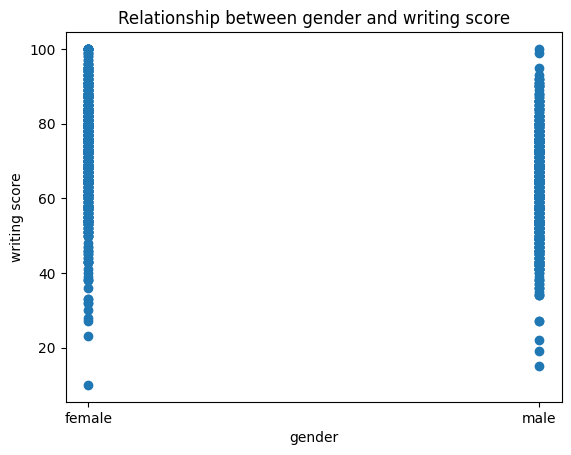

p-value: 2.019877706867934e-22


In [36]:
plotRelationship("gender", "writing score", ["male", "female"])

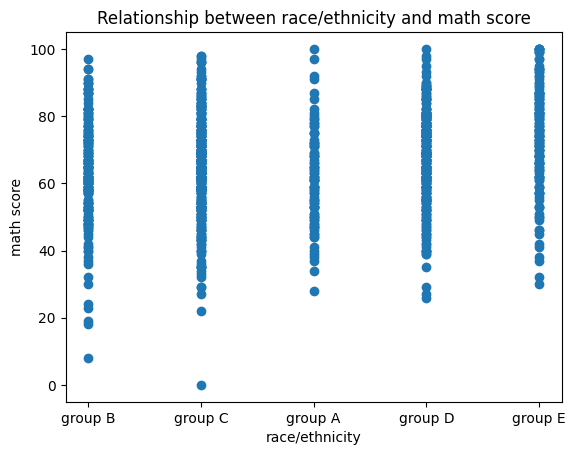

p-value: 0.3503415961659957


In [37]:
plotRelationship("race/ethnicity", "math score", ["group A", "group B", "group C", "group D", "group E"])

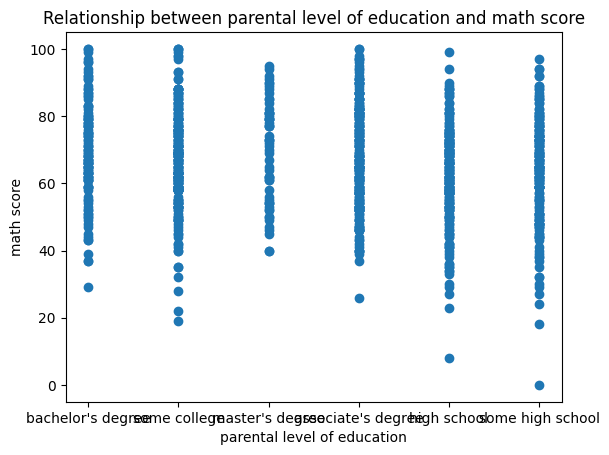

p-value: 0.388108610360687


In [38]:
plotRelationship("parental level of education", "math score", ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])

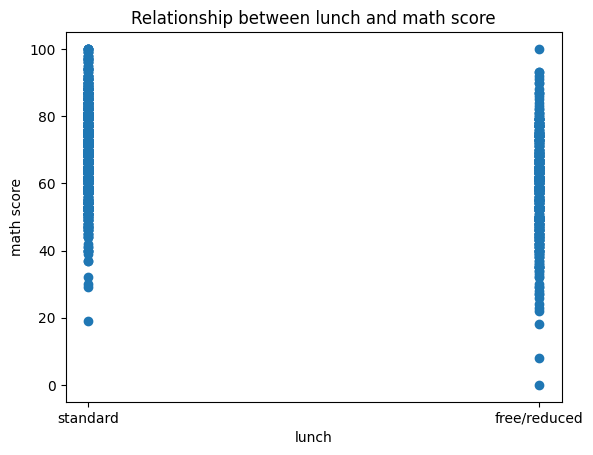

p-value: 2.4131955993137074e-30


In [39]:
plotRelationship("lunch", "math score", ["standard", "free/reduced"])

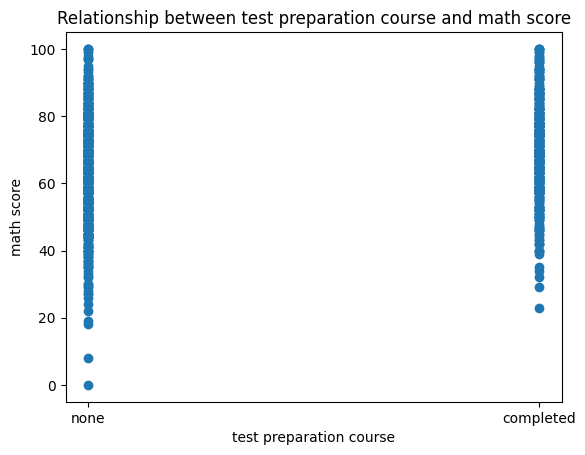

p-value: 1.5359134607147415e-08


In [40]:
plotRelationship("test preparation course", "math score", ["none", "completed"])

In [41]:
gender_map = {'male': 0, 'female': 1}
df['gender'] = df['gender'].replace(gender_map)

education_map = {'some high school': 0, 'high school': 1, 'some college': 2, 
                 "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
df['parental level of education'] = df['parental level of education'].replace(education_map)

lunch_map = {'free/reduced': 0, 'standard': 1}
df['lunch'] = df['lunch'].replace(lunch_map)

test_map = {'none': 0, 'completed': 1}
df['test preparation course'] = df['test preparation course'].replace(test_map)

In [42]:
def one_hot_encoding(dataframe, category):
  one_hot_encoded = pd.get_dummies(dataframe[category])
  df_encoded = pd.concat([dataframe, one_hot_encoded], axis=1)
  return df_encoded

In [43]:
categories = ['race/ethnicity']

for category in categories:
    df = one_hot_encoding(df, category)

<Axes: ylabel='math score'>

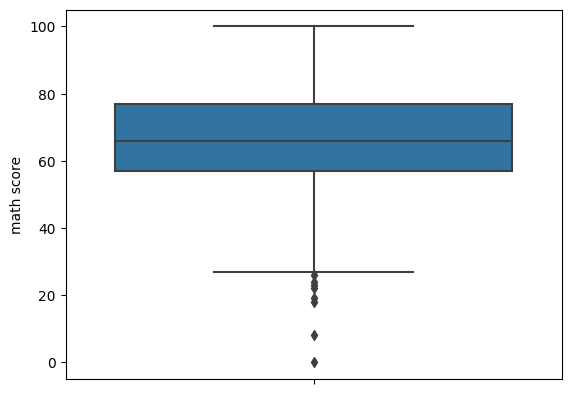

In [44]:
import seaborn as sns

sns.boxplot(data=df, y="math score")

In [45]:
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5*IQR

df = df[df["math score"] < threshold]

In [46]:
# import numpy as np
# from scipy.spatial.distance import mahalanobis

# X = df[['math score', 'reading score', 'writing score']]
# cov = np.cov(X.T)
# inv_covmat = np.linalg.inv(cov)
# mean = np.mean(X)
# df['mahalanobis'] = [mahalanobis(X.iloc[i], mean, inv_covmat) for i in range(len(X))]

# threshold = df['mahalanobis'].quantile(0.025)
# df = df[df['mahalanobis'] <= threshold]

In [47]:
df['math score discretized'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

We could just use LinearRegression istead of Logistic one with *discretization*

In [48]:
print(df)

     gender race/ethnicity  parental level of education  lunch  \
0         1        group B                            4      1   
1         1        group C                            2      1   
2         1        group B                            5      1   
3         0        group A                            3      0   
4         0        group C                            2      1   
..      ...            ...                          ...    ...   
995       1        group E                            5      1   
996       0        group C                            1      0   
997       1        group C                            1      0   
998       1        group D                            2      1   
999       1        group D                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69             90    

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


def generate_data_set_selectkbest(K):
  CategoricalColumns = ['race/ethnicity']
  Scores = ['math score', 'reading score', 'writing score', 'math score discretized', 'reading score discretized', 'writing score discretized']
  Class = 'math score'

  CategoricalColumns = [c for c in CategoricalColumns if c in df.columns]
  Scores = [s for s in Scores if s in df.columns]
  Scores = [s for s in Scores if s != Class]

  X = df
  X = X.drop(CategoricalColumns, axis=1)
  X = X.drop(Scores, axis=1)
  X = X.drop(Class, axis=1)
  y = df[Class]

  selector = SelectKBest(chi2, k=K)
  X_new = selector.fit_transform(X, y)

  mask = selector.get_support()
  new_features = []

  for bool, feature in zip(mask, X.columns):
      if bool:
          new_features.append(feature)
  print(f"k {K}: {new_features}")
  return df[new_features];

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split

prediction_data_sets = {}
prediction_data_sets['No scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course']]
prediction_data_sets['No scores and no race'] = df[['gender', 'parental level of education', 'lunch', 'test preparation course']]
prediction_data_sets['Scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['Scores and no race'] = df[['gender', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['SelectKBest2'] = generate_data_set_selectkbest(2)
prediction_data_sets['SelectKBest5'] = generate_data_set_selectkbest(5)
prediction_data_sets['SelectKBest7'] = generate_data_set_selectkbest(7)

k 2: ['parental level of education', 'group E']
k 5: ['parental level of education', 'lunch', 'group A', 'group B', 'group E']
k 7: ['parental level of education', 'lunch', 'test preparation course', 'group A', 'group B', 'group D', 'group E']


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def model_logisitc_regression(prediction_data):
  class_data = df['math score discretized'];
  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
  model = LogisticRegression(max_iter = 2000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('Accuracy:', accuracy)
  return accuracy

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def model_decision_tree(prediction_data):
  class_data = df['math score discretized']
  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  path = model.cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas = path.ccp_alphas
  ccp_alphas = ccp_alphas[:-1]
  models = []
  for ccp_alpha in ccp_alphas:
      if ccp_alpha < 0:
        continue
      model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
      model.fit(X_train, y_train)
      models.append(model)

  train_scores = [model.score(X_train, y_train) for model in models]
  test_scores = [model.score(X_test, y_test) for model in models]

  best_alpha = ccp_alphas[np.argmax(test_scores)]
  print(f"Best alpha value: {best_alpha}")

  model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('Accuracy:', accuracy)
  return accuracy

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_linear_regression(prediction_data):
  class_data = df['math score']

  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = model.score(X_test, y_test)
  print('Accuracy:', accuracy)

  mae = mean_absolute_error(y_test, y_pred)
  print('MAE:', mae)

  mse = mean_squared_error(y_test, y_pred)
  print('MSE:', mse)

  rmse = np.sqrt(mse)
  print('RMSE:', rmse)
  return rmse

In [74]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

def model_neural_network(prediction_data):
    class_data = df['math score']

    X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)

    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=500, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    print('Accuracy:', accuracy)

    mae = mean_absolute_error(y_test, y_pred)
    print('MAE:', mae)

    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)

    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
    return rmse


In [ ]:
logistic_regression_result = {}
decision_tree_result = {}
linear_regression_result = {}
neural_network_result = {}

num_iterations = 1

for name, prediction_data in prediction_data_sets.items():
  print(f"====={name}=====")
  print(f"---Logistic Regression---")
  logistic_regression_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    logistic_regression_result[name] += model_logisitc_regression(prediction_data)
  logistic_regression_result[name] /= num_iterations
  print(f"---Decision Tree---")
  decision_tree_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    decision_tree_result[name] += model_decision_tree(prediction_data)
  decision_tree_result[name] /= num_iterations
  print(f"---Linear regression---")
  linear_regression_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    linear_regression_result[name] += model_linear_regression(prediction_data)
  linear_regression_result[name] /= num_iterations
  print(f"---Neural Network---")
  neural_network_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    neural_network_result[name] += model_neural_network(prediction_data)
  neural_network_result[name] /= num_iterations

=====No scores=====
---Logistic Regression---
Iteration 1:
Accuracy: 0.87
Iteration 2:
Accuracy: 0.875
Iteration 3:
Accuracy: 0.825
Iteration 4:
Accuracy: 0.885
Iteration 5:
Accuracy: 0.86
---Decision Tree---
Iteration 1:
Best alpha value: 0.001285714285714285
Accuracy: 0.88
Iteration 2:
Best alpha value: 0.0011562499999999997
Accuracy: 0.88
Iteration 3:
Best alpha value: 0.0007126524390243904
Accuracy: 0.885
Iteration 4:
Best alpha value: 0.001371753246753247
Accuracy: 0.905
Iteration 5:
Best alpha value: 0.0011996774787472475
Accuracy: 0.88
---Linear regression---
Iteration 1:
Accuracy: 0.23705980999818288
MAE: 10.894433930301515
MSE: 177.517852575358
RMSE: 13.323582572842712
Iteration 2:
Accuracy: 0.26325578544418793
MAE: 10.232865631375056
MSE: 163.11104333505529
RMSE: 12.771493387034083
Iteration 3:
Accuracy: 0.248585004986423
MAE: 11.125150754332365
MSE: 193.90046035976803
RMSE: 13.924814553873528
Iteration 4:
Accuracy: 0.2084417038669404
MAE: 10.963056769599362
MSE: 176.84203893

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.17573016673129793
MAE: 10.245002584627143
MSE: 162.44635689774586
RMSE: 12.745444554731932
Iteration 2:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.22723624730633574
MAE: 10.994679020068912
MSE: 189.72120960472768
RMSE: 13.773932249170086
Iteration 3:
Accuracy: 0.22962904295744857
MAE: 10.636402734118715
MSE: 171.14129773921377
RMSE: 13.082098369115474
Iteration 4:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.28578276027535165
MAE: 10.33933216325251
MSE: 165.4061240661921
RMSE: 12.861031220947723
Iteration 5:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.1071700551398862
MAE: 10.263965388572347
MSE: 165.10655523250793
RMSE: 12.849379566053294
=====No scores and no race=====
---Logistic Regression---
Iteration 1:
Accuracy: 0.85
Iteration 2:
Accuracy: 0.865
Iteration 3:
Accuracy: 0.9
Iteration 4:
Accuracy: 0.87
Iteration 5:
Accuracy: 0.89
---Decision Tree---
Iteration 1:
Best alpha value: 0.0006805555555555558
Accuracy: 0.87
Iteration 2:
Best alpha value: 0.006156501130001611
Accuracy: 0.875
Iteration 3:
Best alpha value: 0.005480769230769261
Accuracy: 0.855
Iteration 4:
Best alpha value: 0.0
Accuracy: 0.88
Iteration 5:
Best alpha value: 0.0
Accuracy: 0.855
---Linear regression---
Iteration 1:
Accuracy: 0.18002112295761075
MAE: 11.508472785483773
MSE: 203.48134574565597
RMSE: 14.264688771426314
Iteration 2:
Accuracy: 0.06353468385497196
MAE: 11.07030896830112
MSE: 188.43845395718262
RMSE: 13.727288660080788
Iteration 3:
Accuracy: 0.27199961107919635
MAE: 10.84570916963984
MSE: 175.0993633436109
RMSE: 13.232511603758786
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: -1.276222474265115
MAE: 19.492498720091838
MSE: 590.2080418695678
RMSE: 24.294197699647704
Iteration 2:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: -0.24009439835428403
MAE: 14.255978089332471
MSE: 292.4685442642281
RMSE: 17.101711734917885
Iteration 3:


In [70]:
for name, accuracy in logistic_regression_result.items():
  print(f"Logistic regression with {name}: {accuracy}")
print(f"\nLogistic regression average: {np.average(list(logistic_regression_result.values()))}\n")
for name, accuracy in decision_tree_result.items():
  print(f"Decision tree with {name}: {accuracy}")
print(f"\nDecision tree average: {np.average(list(decision_tree_result.values()))}\n")
for name, accuracy in linear_regression_result.items():
  print(f"Linear regression with {name}: (RMSE) {accuracy}")
print(f"\nLinear regression average: {np.average(list(linear_regression_result.values()))}\n")
for name, accuracy in neural_network_result.items():
  print(f"Neural Network with {name}: (RMSE) {accuracy}")
print(f"\\Neural Network average: {np.average(list(neural_network_result.values()))}\n")

Logistic regression with No scores: 0.876
Logistic regression with No scores and no race: 0.859
Logistic regression with Scores: 0.9359999999999999
Logistic regression with Scores and no race: 0.917
Logistic regression with SelectKBest2: 0.8400000000000001
Logistic regression with SelectKBest5: 0.8739999999999999
Logistic regression with SelectKBest7: 0.861

Logistic regression average: 0.8804285714285713

Decision tree with No scores: 0.8859999999999999
Decision tree with No scores and no race: 0.8719999999999999
Decision tree with Scores: 0.933
Decision tree with Scores and no race: 0.917
Decision tree with SelectKBest2: 0.868
Decision tree with SelectKBest5: 0.868
Decision tree with SelectKBest7: 0.869

Decision tree average: 0.8875714285714286

Linear regression with No scores: (RMSE) 13.048044071744703
Linear regression with No scores and no race: (RMSE) 13.51253186442823
Linear regression with Scores: (RMSE) 5.345204631234649
Linear regression with Scores and no race: (RMSE) 5.78